1) Use python to clean the data, get descriptive statistics and default correlations among these variables. (5 marks)

Extracted Columns: ['#', 'Country (or dependency)', 'Population (2025)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

Column Data Types:
Country               object
Population (2025)      int64
Yearly Change        float64
Net Change             int64
Density (P/Km²)        int64
Land Area (Km²)        int64
Migrants (net)         int64
Fert. Rate           float64
Median Age             int64
Urban Pop %          float64
World Share          float64
dtype: object

Descriptive Statistics:
       Population (2025)  Yearly Change    Net Change  Density (P/Km²)  \
count       5.800000e+01      58.000000  5.800000e+01        58.000000   
mean        2.672185e+07       2.067241  5.987368e+05       134.310345   
std         4.076189e+07       0.879124  9.232279e+05       179.207241   
min         5.197000e+03      -0.760000 -2.889000e+03         2.000000   
25%         2.569874e+06       1.7

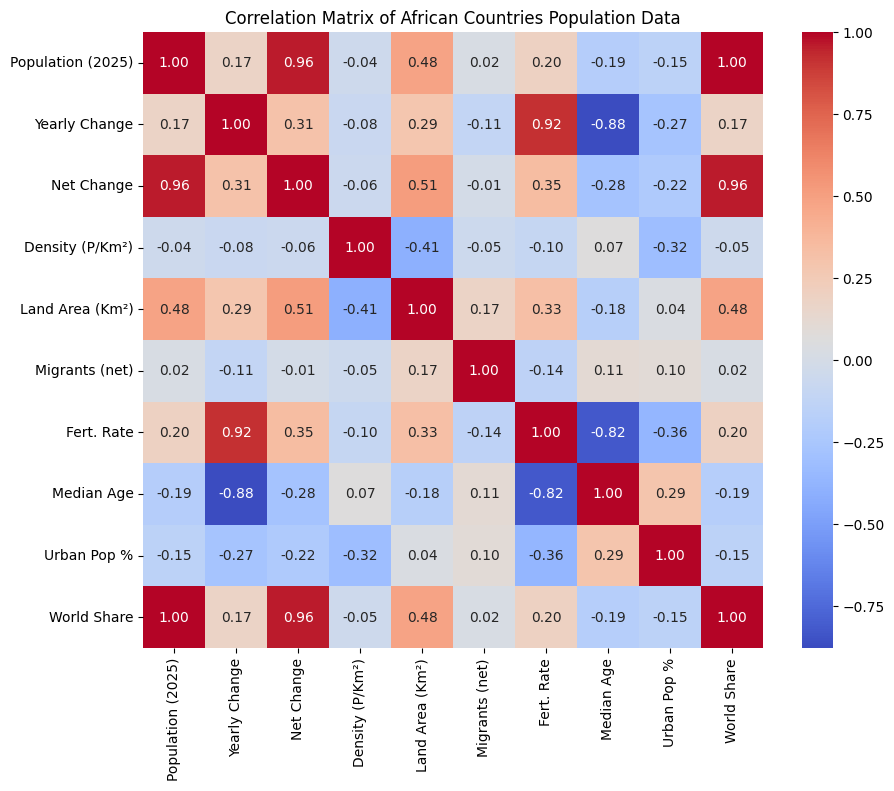

In [6]:
# Import necessary libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from io import StringIO

# Step 1: Scrape the data using requests with headers
url = 'https://www.worldometers.info/population/countries-in-africa-by-population/'
headers = {'User-Agent': 'Mozilla/5.0'}

# Get webpage content
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table
    table = soup.find('table')

    # Convert table to DataFrame using StringIO
    df = pd.read_html(StringIO(str(table)))[0]  # Avoid FutureWarning

    # Print column names to check structure
    print("Extracted Columns:", df.columns.tolist())

    # Rename columns dynamically to match expected format
    df.columns = ['Rank', 'Country', 'Population (2025)', 'Yearly Change', 'Net Change', 'Density (P/Km²)',
                  'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

    # Drop the Rank column as it's not needed
    df = df.drop(columns=['Rank'])

    # Remove any rows where 'Country' is NaN
    df = df.dropna(subset=['Country'])

    # Convert relevant columns to numeric values (remove commas, %, and fix minus signs)
    cols_to_numeric = ['Population (2025)', 'Yearly Change', 'Net Change', 'Density (P/Km²)',
                       'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

    for col in cols_to_numeric:
        df[col] = df[col].astype(str) \
                         .str.replace(',', '', regex=True) \
                         .str.replace('%', '', regex=True) \
                         .str.replace('−', '-', regex=True)  # Fix non-standard minus signs
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float safely

    # Reset index
    df = df.reset_index(drop=True)

    # Print data types to verify numeric conversion
    print("\nColumn Data Types:")
    print(df.dtypes)

    # Step 3: Get Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Step 4: Compute Correlation Matrix (only for numeric columns)
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Step 5: Visualize the Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of African Countries Population Data')
    plt.show()

else:
    print("Failed to retrieve data. HTTP Status Code:", response.status_code)


2) Create a simple Linear Regression model between the two features and determine the r-squared and mean square error values with graphical representation. (5 marks)

R-Squared Value: -0.7360
Mean Squared Error (MSE): 617.5592


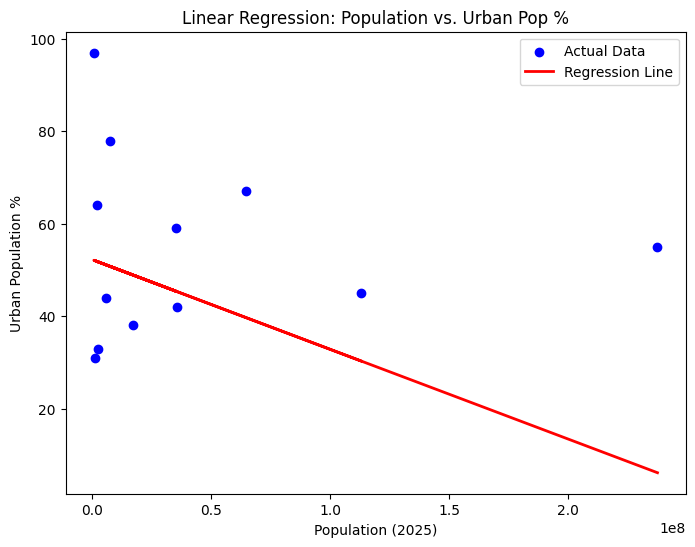

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select two numeric features
X = df[['Population (2025)']]  # Independent variable (Predictor)
y = df['Urban Pop %']          # Dependent variable (Target)

# Step 2: Handle Missing Values (Fix NaNs)
X = X.dropna()  # Drop NaNs in X
y = y[X.index]  # Ensure y has the same index as X
y = y.fillna(y.median())  # Fill NaN values with the median

# Step 3: Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict values for test data
y_pred = model.predict(X_test)

# Step 6: Calculate Model Performance Metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-Squared Value: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 7: Graphical Representation
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Population (2025)')
plt.ylabel('Urban Population %')
plt.title('Linear Regression: Population vs. Urban Pop %')
plt.legend()
plt.show()


3) Create a Multiple Linear Regression model between the other  features  where Net Change is dependent variable. Thus,  determine the r-squared and mean square error values with graphical representation. (5 marks)

R-Squared Value: 0.9396
Mean Squared Error (MSE): 136569290710.8928


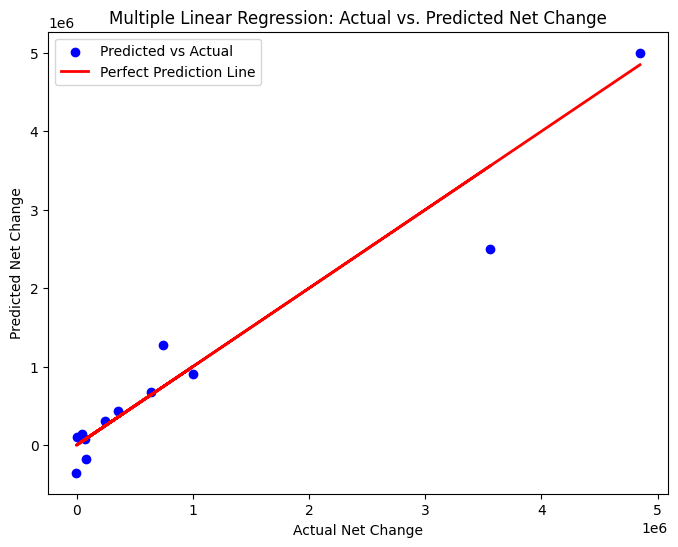

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define dependent and independent variables
y = df['Net Change']  # Dependent variable (Target)

# Use all numerical features EXCEPT 'Net Change' as independent variables
X = df[['Population (2025)', 'Yearly Change', 'Density (P/Km²)',
        'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']]

# Step 2: Handle Missing Values (Fix NaNs)
X = X.dropna()  # Drop NaNs in X
y = y[X.index]  # Ensure y has the same index as X
y = y.fillna(y.median())  # Fill NaN values in y with the median

# Step 3: Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict values for test data
y_pred = model.predict(X_test)

# Step 6: Calculate Model Performance Metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-Squared Value: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 7: Graphical Representation (Actual vs. Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Net Change')
plt.ylabel('Predicted Net Change')
plt.title('Multiple Linear Regression: Actual vs. Predicted Net Change')
plt.legend()
plt.show()


4) Create a polynomial  Regression model between the two features media age and fertility rate. Hence determine the r-squared and mean square error values with graphical representation. (5 marks)

R-Squared Value: 0.8404
Mean Squared Error (MSE): 0.2603


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


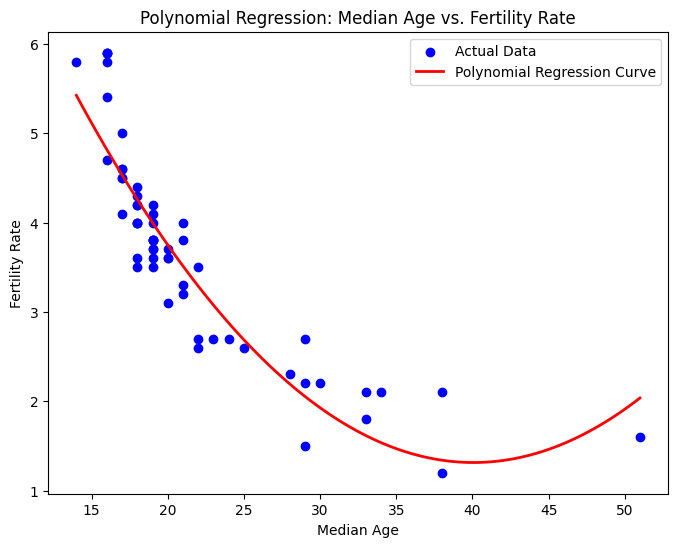

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select Features
X = df[['Median Age']]  # Independent variable
y = df['Fert. Rate']    # Dependent variable

# Step 2: Handle Missing Values
X = X.dropna()
y = y[X.index]
y = y.fillna(y.median())

# Step 3: Transform into Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2)  # Change degree for more complexity
X_poly = poly.fit_transform(X)

# Step 4: Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 5: Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict Values
y_pred = model.predict(X_test)

# Step 7: Evaluate Model Performance
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-Squared Value: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 8: Plot the Polynomial Regression Curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

# Generate smooth curve for better visualization
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create smooth X values
X_curve_poly = poly.transform(X_curve)  # Transform for polynomial model
y_curve = model.predict(X_curve_poly)  # Predict curve values

plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.title('Polynomial Regression: Median Age vs. Fertility Rate')
plt.legend()
plt.show()
